# Лабораторная работа №0
## Задание
### Применить нейронную сеть Кохонена с самообучение для задачи кластеризации.
### На первом этапе сгенерировать случайные точки на плоскости вокруг 2 центров кластеризации (примерно по 20-30 точек).
### Далее считать, что сеть имеет два входа (координаты точек) и два выхода – один из них равен 1, другой 0 (по тому, к какому кластеру принадлежит точка).
### Подавая последовательно на вход (вразнобой) точки, настроить сеть путем применения описанной процедуры обучения так, чтобы она приобрела способность определять, к какому кластеру принадлежит точка.
### Коэффициент 𝛼 выбрать, уменьшая его от шага к шагу по правилу 𝛼 = (50−𝑖)/100, причем для каждого нейрона это будет свое значение 𝛼, а подстраиваться на каждом шаге будут веса только одного (выигравшего) нейрона.

In [703]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=60,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=56,
                           class_sep=2)

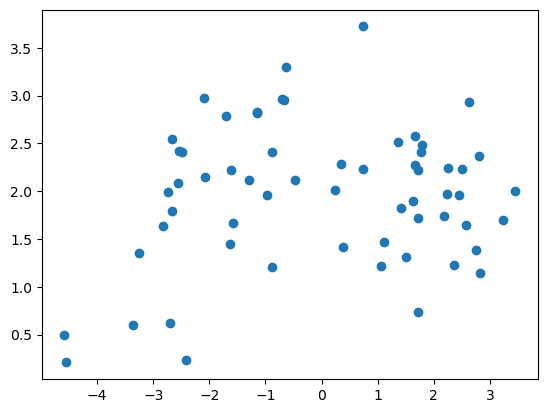

In [704]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [705]:
import numpy as np


def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [706]:
from scipy.cluster.hierarchy import fcluster, linkage

mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 1.83254732,  1.96280369],
       [-2.03146912,  1.94312656]])

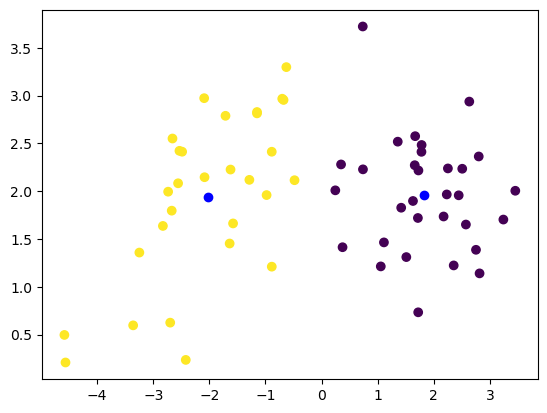

In [707]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='blue')

In [708]:
import math


class SOM:
    def __init__(self, n, c):
        """
        n - количестов атрибутов
        C - количество кластеров
        """
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        """
        Вычисление значение шага относительного текущего выбора
        """
        return (50 - i) / 100

    def winner(self, weights, sample):
        """
        Вычисляем выигравший нейрон (вектор) по Евклидову расстоянию
        """
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        """
        Обновляем значение для выигравшего нейрона
        """
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + self.calculate_a(self.a[j]) * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [709]:
# Обучающая выборка (m, n)
# m - объем выборки
# n - количество атрибутов в записи
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

# Обучающие веса (n, C)
# n - количество атрибутов в записи
# C - количество кластеров
C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[1.09909639, 0.86606284],
       [0.92866499, 0.98073679]])

In [710]:
som = SOM(n, C)
som

In [711]:
for i in range(m):
    sample = T[i]
    J = som.winner(weights, sample)
    weights = som.update(weights, sample, J)


Шаг для 0 кластера = 0.5
Веса после обновления:
[[0.10539675 1.63957672]
 [0.92866499 0.98073679]]

Шаг для 1 кластера = 0.5
Веса после обновления:
[[ 0.10539675  1.63957672]
 [-0.74608651  0.60786591]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[0.10539675 1.63957672]
 [0.46070016 1.1527871 ]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[ 0.10539675  1.63957672]
 [-0.18657318  1.1805079 ]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[0.10539675 1.63957672]
 [0.95939365 1.67774359]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[0.59831767 1.55378581]
 [0.95939365 1.67774359]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[ 0.59831767  1.55378581]
 [-0.72308084  1.19341266]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[-0.01426921  2.22633064]
 [-0.72308084  1.19341266]]

Шаг для 1 кластера = 0.45
Веса после обновления:
[[-0.01426921  2.22633064]
 [-0.61475555  1.60819071]]

Шаг для 1 кластера = 0.44
Веса после обновления:
[[-0.01426921  2.226330

In [712]:
s = X[0]
J = som.winner(weights, s)

print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Элемент принадлежит к 1 кластеру, на самом деле к 1 кластеру
Обученные веса: 
[[-0.03004055  1.94265381]
 [ 0.23121714  2.0696989 ]]


In [713]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [714]:
y == predicted

array([ True, False,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True])

In [715]:
from sklearn.metrics import accuracy_score

print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 63.33333333333333%
